
## Project Description

Modern deep learning hinges on variants of stochastic gradient descent. Give an overview of some of the algorithms (ADAM,
RMSProp, Adagrad,momentum, etc.) and stepsizing schemes (learning rate decay, cosine annealing, superconvergence, hyper-
gradient learning rate adaptation, etc.) and perform an empirical comparison of their performance on some test problems of
your choice. Obviously, no comparison here can be anywhere close to exhaustive due to the overabundance of deep learning op-
timization papers, so just go through a handful of ideas that you find interesting. If you want to do this with realistic (somewhat
large) networks, you’ll probably need access to some GPUs. This will take a bit more work (but should still be doable!) to do
as a project if you don’t have any previous experience in deep learning.




## Text Generation


### Imports

In [1]:
# Reload external files when running cells
%load_ext autoreload
%autoreload 2

# Imports
import torch
import numpy as np
import pathlib
import os
import sys
import matplotlib.pyplot as plt

# Add custom package to import path and import it
file_dir = pathlib.Path().resolve()
pkg_dir = os.path.join(file_dir, "submodules")
print(pkg_dir)
sys.path.insert(0, pkg_dir)
sys.path.insert(0, os.path.join(pkg_dir, "minGPT"))
sys.path.insert(0, os.path.join(pkg_dir, "amath515_pkg"))
from amath515_pkg.src import *

# Load config file
config = helpers.get_config()

# Print matplotlibe plots inline
%matplotlib inline


/home/alexey/School/Classes/AMATH 515/AMATH515_Project/submodules


### Load data

In [2]:

# Loading data
saved_dir = os.path.join(file_dir, 'Saved_Data')
saved_data_d = {"minGPT_loss": list(), "CNN_train_loss": list(), "CNN_test_loss": list(),\
                "CNN_train_acc": list(), "CNN_test_acc": list()} # Dict storing lists of values that we'll plot
for model in ["minGPT", "CNN"]:
    for sgd_method in ["Adam", "AdamW", "RMSprop", "Adagrad"]:
        for scheduler in ["StepLR", "CosineAnnealingLR"]:
            fn = os.path.join(saved_dir, f"{model}_{sgd_method}_{scheduler}.torch")
            saved_data = torch.load(fn)

            if model == 'CNN':
                saved_data_d['CNN_train_loss'].append((sgd_method, scheduler, saved_data['train_loss']))
                saved_data_d['CNN_test_loss'].append((sgd_method, scheduler, saved_data['test_loss']))
                saved_data_d['CNN_train_acc'].append((sgd_method, scheduler, saved_data['train_acc']))
                saved_data_d['CNN_test_acc'].append((sgd_method, scheduler, saved_data['test_acc']))

                print(f"CNN min train loss ({sgd_method}, {scheduler}) ", min(saved_data['train_loss']))
                print(f"CNN min test loss ({sgd_method}, {scheduler})", min(saved_data['test_loss']))
                print(f"CNN max train acc ({sgd_method}, {scheduler})", max(saved_data['train_acc']))
                print(f"CNN max test acc ({sgd_method}, {scheduler})", max(saved_data['test_acc']))

            elif model == 'minGPT':
                saved_data_d['minGPT_loss'].append((sgd_method, scheduler, saved_data['losses']))
                print(f"minGPT min ({sgd_method}, {scheduler}) train loss", min(saved_data['losses']))


minGPT min (Adam, StepLR) train loss 2.5034420490264893
minGPT min (Adam, CosineAnnealingLR) train loss 2.500284433364868
minGPT min (AdamW, StepLR) train loss 1.546491265296936
minGPT min (AdamW, CosineAnnealingLR) train loss 1.5783721208572388
minGPT min (RMSprop, StepLR) train loss 2.507582187652588
minGPT min (RMSprop, CosineAnnealingLR) train loss 2.5042648315429688
minGPT min (Adagrad, StepLR) train loss 2.5778250694274902
minGPT min (Adagrad, CosineAnnealingLR) train loss 2.589722156524658
CNN min train loss (Adam, StepLR)  0.06646529878513176
CNN min test loss (Adam, StepLR) 0.06651028691546683
CNN max train acc (Adam, StepLR) 48.606
CNN max test acc (Adam, StepLR) 48.81
CNN min train loss (Adam, CosineAnnealingLR)  0.06617421096509811
CNN min test loss (Adam, CosineAnnealingLR) 0.06610137524857491
CNN max train acc (Adam, CosineAnnealingLR) 48.88
CNN max test acc (Adam, CosineAnnealingLR) 48.75
CNN min train loss (AdamW, StepLR)  0.06663951039789119
CNN min test loss (AdamW, S

### Aggregate plots and save them

Saved plot to "/home/alexey/School/Classes/AMATH 515/AMATH515_Project/Plots/Aggregate/CNN_training_accuracies.pdf"


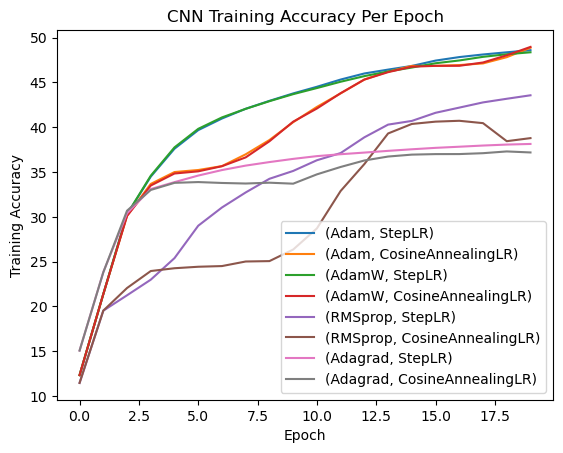

Saved plot to "/home/alexey/School/Classes/AMATH 515/AMATH515_Project/Plots/Aggregate/CNN_testing_accuracies.pdf"


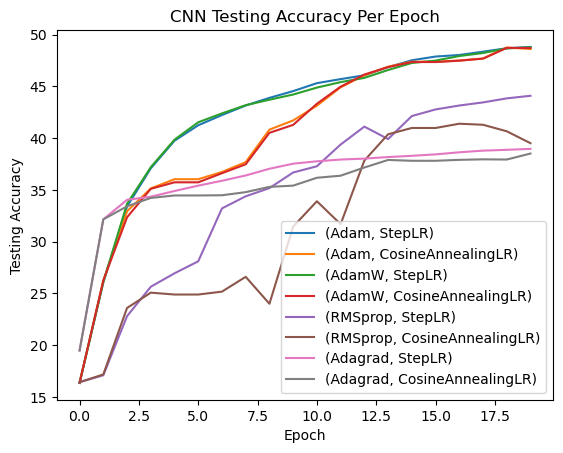

Saved plot to "/home/alexey/School/Classes/AMATH 515/AMATH515_Project/Plots/Aggregate/CNN_training_losses.pdf"


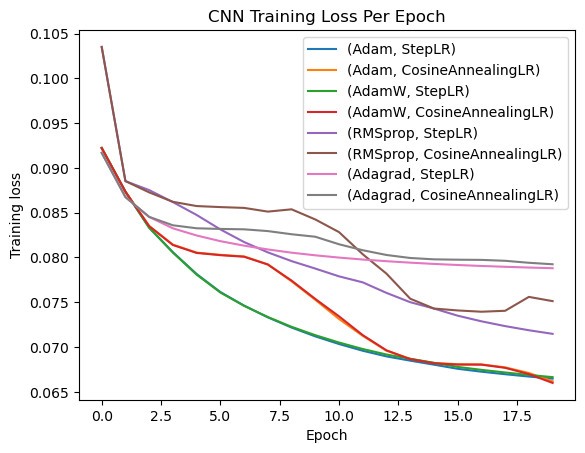

Saved plot to "/home/alexey/School/Classes/AMATH 515/AMATH515_Project/Plots/Aggregate/CNN_testing_losses.pdf"


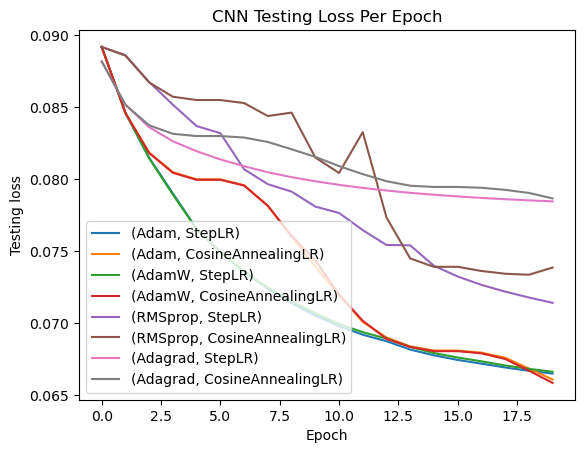

Saved plot to "/home/alexey/School/Classes/AMATH 515/AMATH515_Project/Plots/Aggregate/minGPT_testing_losses.pdf"


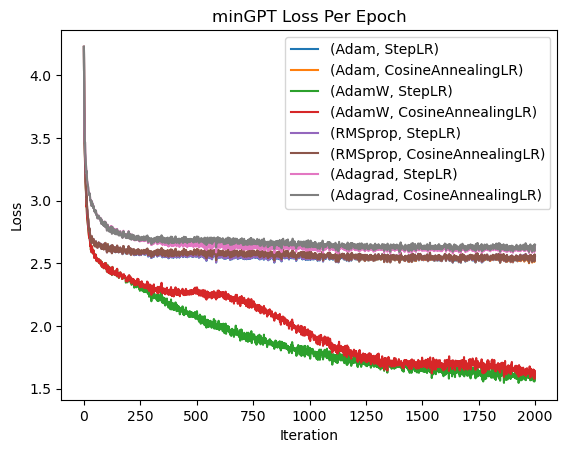

In [3]:

plot_dir = os.path.join(file_dir, "Plots", "Aggregate")
os.makedirs(plot_dir, mode=0o777, exist_ok=True)

def plot_and_save(data, title: str, x_axis: str, y_axis: str, plot_fn: str):
    # Plot losses
    for sgd_method, scheduler, data_x in data:
        plt.plot(data_x, label=f"({sgd_method}, {scheduler})")
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.legend()

    # Save losses
    plot_abs = os.path.join(plot_dir, plot_fn)
    plt.savefig(plot_abs)
    print(f"Saved plot to \"{plot_abs}\"")

    plt.show()

# Plot accuracies
plot_fn = f"CNN_training_accuracies.pdf"
plot_and_save(saved_data_d['CNN_train_acc'], "CNN Training Accuracy Per Epoch", "Epoch", "Training Accuracy", plot_fn)

plot_fn = f"CNN_testing_accuracies.pdf"
plot_and_save(saved_data_d['CNN_test_acc'], "CNN Testing Accuracy Per Epoch", "Epoch", "Testing Accuracy", plot_fn)

# Plot losses
plot_fn = f"CNN_training_losses.pdf"
plot_and_save(saved_data_d['CNN_train_loss'], "CNN Training Loss Per Epoch", "Epoch", "Training loss", plot_fn)

plot_fn = f"CNN_testing_losses.pdf"
plot_and_save(saved_data_d['CNN_test_loss'], "CNN Testing Loss Per Epoch", "Epoch", "Testing loss", plot_fn)

plot_fn = f"minGPT_testing_losses.pdf"
plot_and_save(saved_data_d['minGPT_loss'], "minGPT Loss Per Epoch", "Iteration", "Loss", plot_fn)
